In [1]:
import networkx as nx
from copy import deepcopy
import math
import numpy as np
from tqdm import tqdm

In [3]:
import matplotlib.pyplot as plt

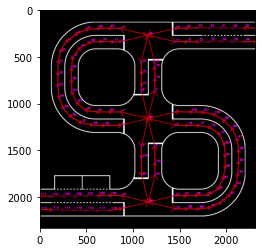

In [4]:
G = nx.read_graphml('test_track.graphml')
import cv2
img=cv2.imread("Test_track.png")
plt.imshow(img)

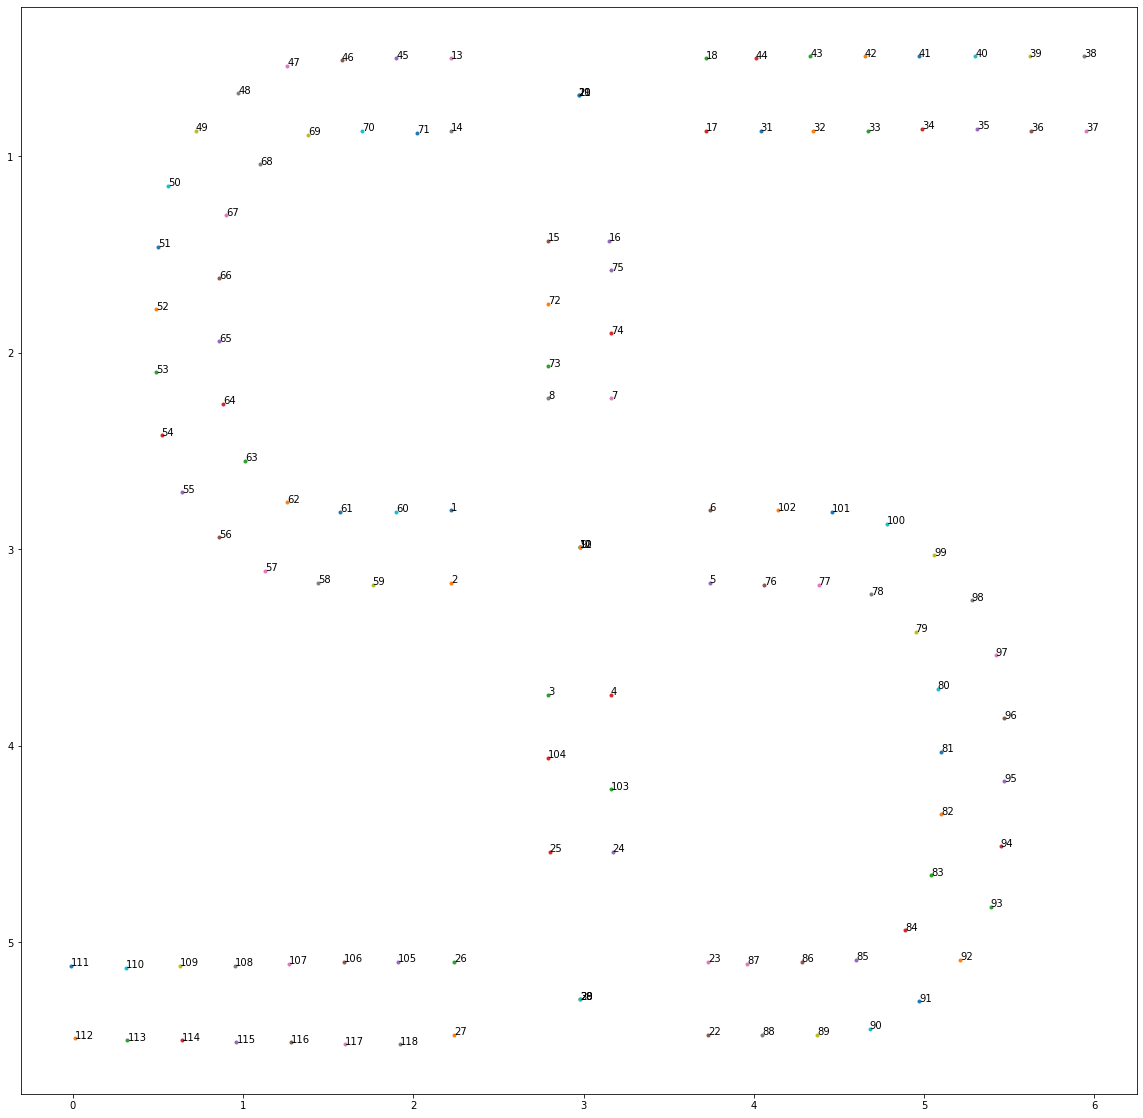

In [5]:
plt.figure(figsize=(20,20))
for node,data in G.nodes(data=True):
    plt.plot(data['x'],data['y'],'.')
    ax = plt.gca()
    ax.annotate(str(node), (data['x'],data['y'])) 

ax = plt.gca()
ax.invert_yaxis()

In [24]:
for i in G.neighbors('112'):
    print(i)

113


In [9]:
for i in G.neighbors('10'):
    print(i)

5
7
1


In [84]:
import heapq

def dijkstra(G, start, target):
    d = {start: 0}
    parent = {start: None}
    pq = [(0, start)]
    visited = set()
    while pq:
        du, u = heapq.heappop(pq)
        if u in visited:
            continue
        if u == target:
            break
        visited.add(u)
        for v  in G.adj[u]:
            if v not in d or d[v] > du + 1:
                d[v] = du + 1
                parent[v] = u
                heapq.heappush(pq, (d[v], v))

    
    fp = [target]
    tg = target
    ptype=[("lk" if len([i for i in G.neighbors(tg)])<2 else "int")]
    
    while tg != start:
        fp.insert(0, parent[tg])
        tg = parent[tg]
        ptype.insert(0,("lk" if len([i for i in G.neighbors(tg)])<2 else "int"))
        # print([i for i in G.neighbors(tg)])
    
    ptyperet=ptype.copy()
    for i in range(len(ptype)):
        if ptype[i]=='int':
            try:
                ptyperet[i-1]="int"
            except:
                pass
            try:
                ptyperet[i+1]="int"
                i+=1
            except:
                pass
    
    edgeret=[]
    
    for i in range(len(fp)-1):
        dt=G.get_edge_data(fp[i],fp[i+1])
        edgeret.append(dt['dotted'])
        
    edgeret.append(None)
        
            
    return fp,ptyperet,edgeret

In [85]:
path_list=dijkstra(G,'112','67')

In [86]:
path_list

(['112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '27',
  '30',
  '24',
  '103',
  '4',
  '10',
  '1',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67'],
 ['lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'int',
  'int',
  'int',
  'lk',
  'int',
  'int',
  'int',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk',
  'lk'],
 [False,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  None])

In [87]:
G.edges('10',data=True)

OutEdgeDataView([('10', '5', {'dotted': False}), ('10', '7', {'dotted': False}), ('10', '1', {'dotted': False})])

In [93]:
node_dict=G.nodes(data=True)

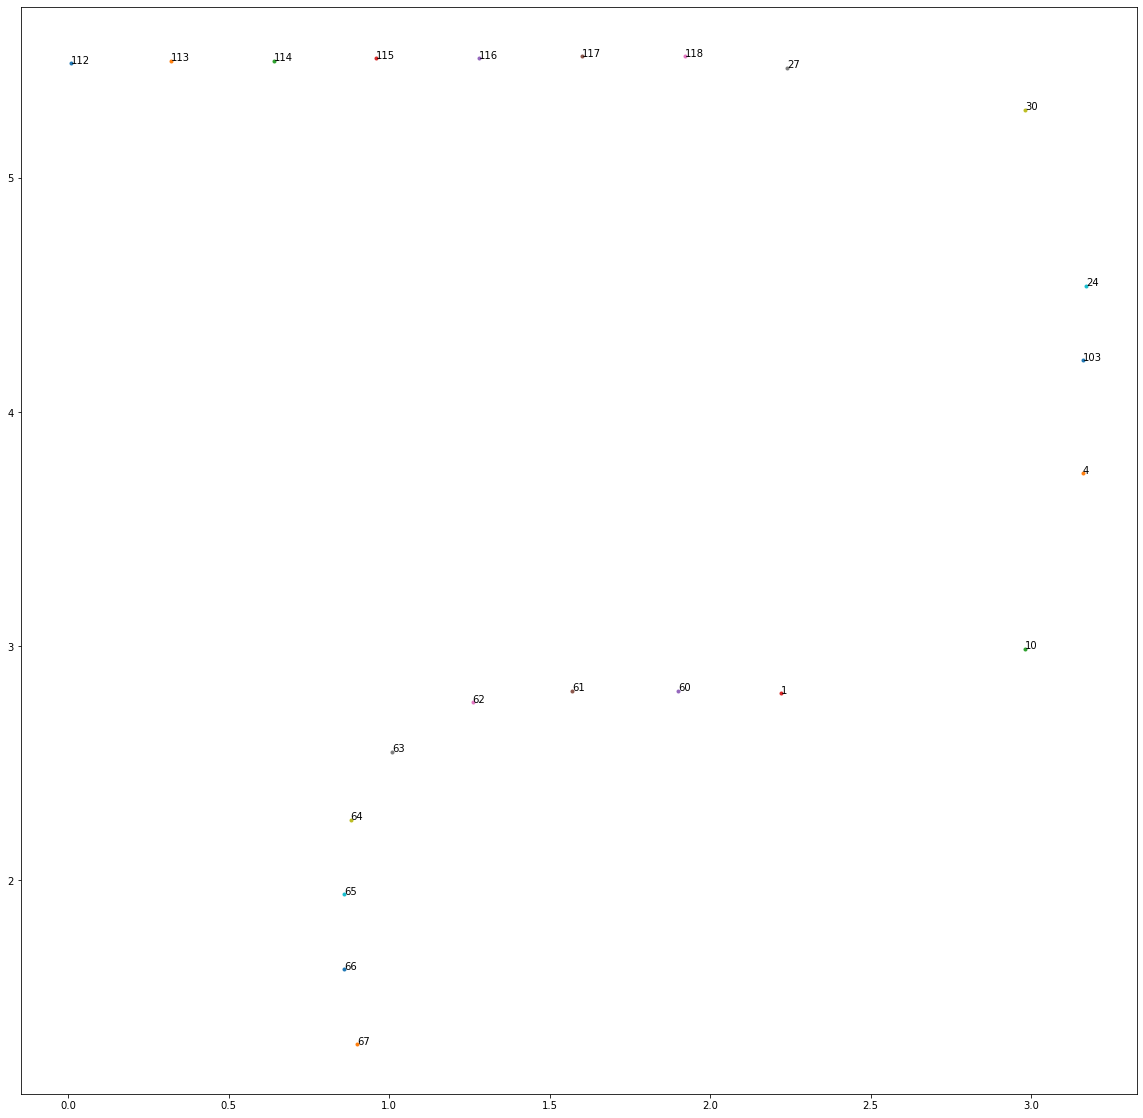

In [95]:
coord_list=[]
plt.figure(figsize=(20,20))
for i in path_list[0]:
    data=node_dict[i]
    plt.plot(data['x'],data['y'],'.')
    coord_list.append([data['x'],data['y']])
    ax = plt.gca()
    ax.annotate(str(i), (data['x'],data['y'])) 